# Population Dynamics Assignment

This is the assignment for Nathaniel Virgo's lectures on population dynamics, as part of the ELSI course.

**This code has been corrected.** Please use this file and not the version of the code in the "Population Dynamics I" lecture.

---

You can download this notebook and run it locally if you have Python installed, but you can also access it online at https://nathanielvirgo.github.io/shared-notebooks/lab?path=Population+dynamics+I.ipynb.

If you're viewing this online you can edit the document and run Python code. Your edits will only exist in your browser's cache - other people can't see them.

It's better to use a recent version of Chrome or Firefox when viewing this notebook. If you have problems, try using Chrome.

To run Python code, hold shift and press enter. If you run each cell in sequence, it should re-create all the graphs. If you get an error it probably means you have to run one of the other cells first.

---

If you're using the online version, when you first open this file, select "Run all cells" from the "Run" menu above. This should solve any issues with getting the code to run.

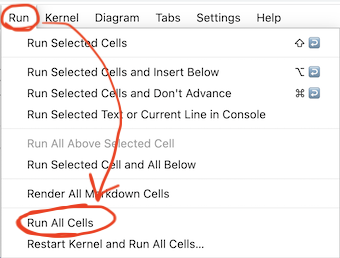

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.rcParams['figure.figsize'] = [12, 6]

In [4]:
# a convenient function for plotting - put the axes at x=0, y=0.
def center_axes():
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')

$$
\\[4cm]
$$

# <ins>Assignment</ins>

The code in the following cell will solve the Lotka-Volterra equations with intraspecific competition terms and create both plots. (The trajectories and the phase portrait.)

---

### Task 1.

Explore the effects of the initial conditions, i.e. the variables `initial_x` and `initial_y` below. How do the initial conditions affect the dynamics? What happens to the prey population if there are no predators (`initial_y = 0`)? Can you find initial conditions where the prey population crashes almost to zero? Explain your answer (1-2 paragraphs). Feel free to include copies of the plots in your writeup.

### Task 2.

Briefly explore the effect that the intraspecific competition parameters ($e$ and $f$) have on the dynamics. Can you find values for `e` and `f` where the oscillations die out very quickly, or where they last a long time before dying out? Explain your answer and feel free to include plots. (1-2 paragraphs.)

### Task 3.

What about the other parameters, $a$, $b$, $c$ and $d$? Can you find settings where the predators *cannot survive* no matter what the initial conditions are? This one is a little bit more tricky. Explain your answer and feel free to include plots, 1-2 paragraphs.

---

Important: for each task, the marks will be awarded for the quality of your explanation.

Please submit your writeup in pdf format.

as a reminder, the equations are:

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = x(a-by - ex) \\[1em]
\frac{\mathrm{d}y}{\mathrm{d}t} = y(-c + dx - fy).
$$

$$
\\[4cm]
$$

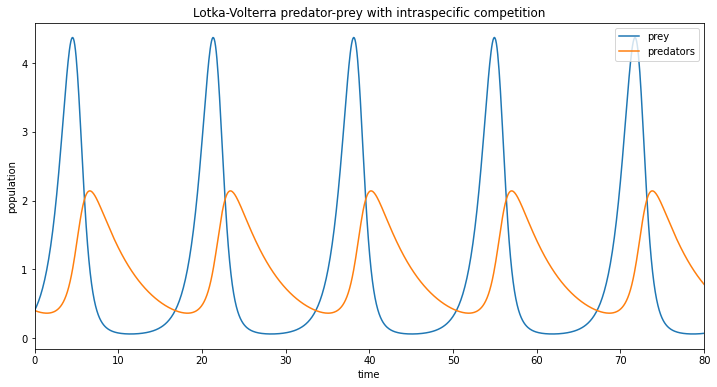

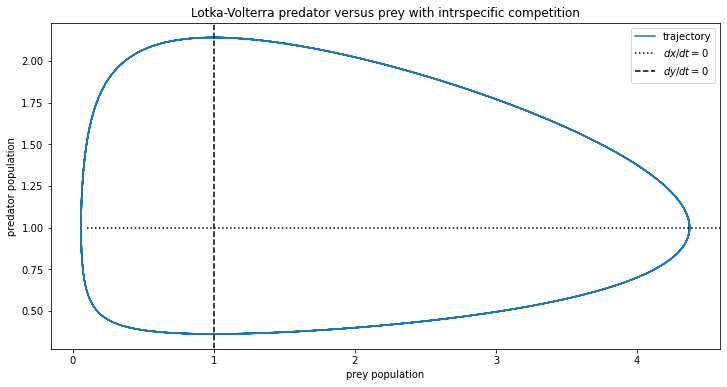

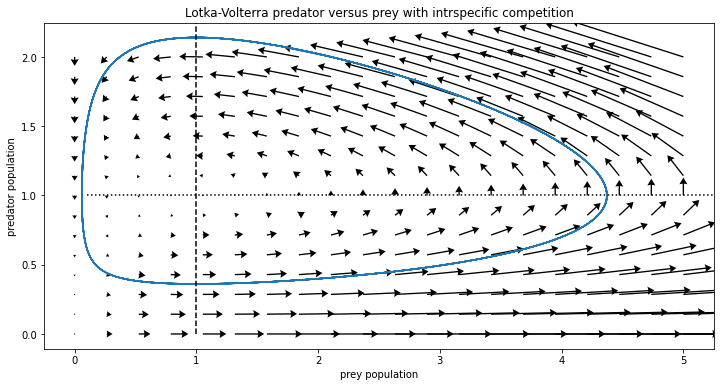

In [5]:
# parameters of the Lotka-Volterra equations (for predator-prey with intraspecific competition)

a = 1               # growth rate of prey
b = 1               # rate at which predators decrease the prey population

c = 0.2             # death rate of predators
d = 0.2             # rate at which prey increase the predator population

e = 0.0            # intraspecific competition for prey
f = 0.0            # intraspecific competition for predators

max_time = 80.0     # simulate until this time

initial_x = 0.4       # initial population of prey
initial_y = 0.4       # initial population of predators



# you don't have to change these - they are just for the arrows in the third plot.

max_x_for_arrows = 5.0
max_y_for_arrows = 2.0
arrow_scale = 30         # a larger number will draw smaller arrows

# you don't need to change anything below this line.
# --------------------------------------------------------------------------------------------------------

def lotka_volterra_2(t, state, a, b, c, d, e, f):
    x, y = state
    dx = x*( a - b*y - e*x)
    dy = y*(-c + d*x - f*y)
    return [dx,dy]


t_span = (0.0,max_time)
t_points = np.linspace(t_span[0], t_span[1], 1000)

initial_state = [initial_x, initial_y]

result_2 = solve_ivp(lotka_volterra_2, t_span, initial_state, t_eval=t_points, args=(a,b,c,d,e,f), method='RK45', rtol=1e-10, atol=1e-10)


# first plot: populations over time

plt.title("Lotka-Volterra predator-prey with intraspecific competition")
plt.ylabel("population")
plt.xlabel("time")

plt.plot(result_2.t, result_2.y[0,:], label="prey")
plt.plot(result_2.t, result_2.y[1,:], label="predators")
plt.xlim(*t_span)
#center_axes()
plt.legend()
plt.show()


# second plot: phase diagram

plt.title("Lotka-Volterra predator versus prey with intrspecific competition")
plt.ylabel("predator population")
plt.xlabel("prey population")

plt.plot(result_2.y[0,:], result_2.y[1,:], label="trajectory")

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

# x isocline
x = np.array([0.1,20])
y = (a-e*x)/b 
plt.plot(x,y,'k:',label="$dx/dt=0$",scalex=False, scaley=False)

# y isocline
if f==0:
    x = np.ones_like(x)*c/d
    y = np.array([0.001,20])
else:
    x = np.array([0.001,20])
    y = (-c+d*x)/f 
plt.plot(x,y,'k--',label="$dy/dt=0$",scalex=False, scaley=False)

    
#center_axes()
plt.legend()
plt.show()

# third plot: the vector field


plt.title("Lotka-Volterra predator versus prey with intrspecific competition")
plt.ylabel("predator population")
plt.xlabel("prey population")

plt.plot(result_2.y[0,:], result_2.y[1,:], label="trajectory")

x,y = np.meshgrid(np.linspace(0,max_x_for_arrows,20),np.linspace(0,max_y_for_arrows,15))

xdot = np.zeros_like(x)
ydot = np.zeros_like(x)

# inefficient Python loop
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        xdot[i,j], ydot[i,j] = lotka_volterra_2(0, (x[i,j], y[i,j]), a, b, c, d, e, f)

plt.quiver(x,y,xdot,ydot, scale=30, width=0.002, headwidth=6)
        
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()


# x isocline
x = np.array([0.1,20])
y = (a-e*x)/b 
plt.plot(x,y,'k:',label="$dx/dt=0$",scalex=False, scaley=False)

# y isocline
if f==0:
    x = np.ones_like(x)*c/d
    y = np.array([0.001,20])
else:
    x = np.array([0.001,20])
    y = (-c+d*x)/f 
plt.plot(x,y,'k--',label="$dy/dt=0$",scalex=False, scaley=False)


#plt.legend()
plt.show()
